### 3. В мешке лежат три кубика: 6-гранный, 12-гранный, 20-гранный. Мы достали один кубик на удачу, подкинули его, и на нем выпало число N. Какова вероятность того, что если мы достанем еще один кубик из оставшихся в мешке и подкинем его, на нем выпадет меньше N?

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [2]:
i = 100000000

In [3]:
# создаем все возможные комбинации из двух кубиков
cube_comb = np.array(list(itertools.permutations([0,1,2], 2)), dtype = np.int8)

In [4]:
# создаем случайные индексы для массива cube_comb
cube_arr_ind = np.random.randint(0, cube_comb.shape[0],i, dtype = np.int8)

In [5]:
# массив из пар случайных комбинаций двух кубиков
var_cube_get = np.full((i,2), 0, dtype = np.int8)
var_cube_get = cube_comb[cube_arr_ind,:]

In [6]:
# получаем массив из случайных значений соответствующих кубиков
var_num = np.full((i,2),0, dtype = np.int8)
var_num[var_cube_get==0] = np.random.choice(np.arange(1, 7), var_num[var_cube_get==0].shape[0]) # 6-гранный
var_num[var_cube_get==1] = np.random.choice(np.arange(1, 13), var_num[var_cube_get==1].shape[0]) # 12-гранный
var_num[var_cube_get==2] = np.random.choice(np.arange(1, 21), var_num[var_cube_get==2].shape[0]) # 20-гранный

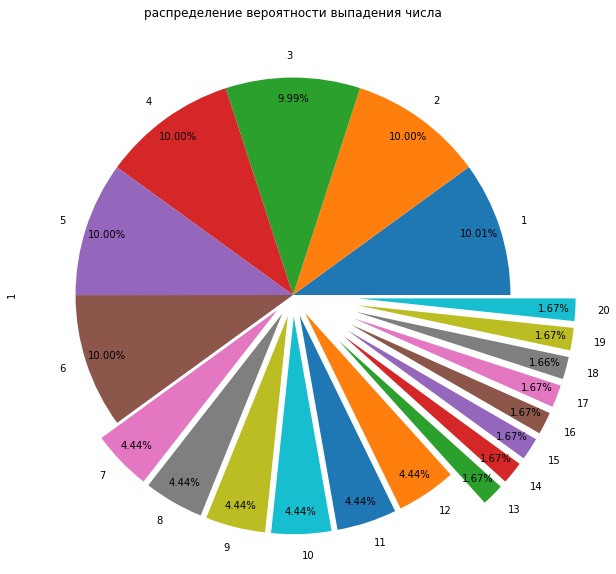

In [7]:
df = pd.DataFrame(var_num)
plt.figure(figsize=(10,10))
plt.title('распределение вероятности выпадения числа')
df[1].value_counts(sort=False).plot.pie(
    autopct='%1.2f%%', 
    pctdistance = 0.9, 
    explode =[0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])
plt.show()

In [8]:
# разница между значениями первого и второго кубика
res = np.diff(var_num, axis=1).ravel()

In [9]:
print('Вероятность того, что число, выпавшее на втором кубике, будет меньше числа на первом: {:.2%}'.format(res[res<0].shape[0]/res.shape[0]))

Вероятность того, что число, выпавшее на втором кубике, будет меньше числа на первом: 46.95%


#### n=12 : первым кубик был 12 или 20 гранный, значит распределение вероятности выпадения кубиков 6, 12, 20 => [0.5, 0.25, 0.25]

In [10]:
var_cube_get = np.full((i,2), 0, dtype = np.int8)
var_cube_get[:,1] = np.random.choice([0,1,2], i, p=[0.5,0.25,0.25])

In [11]:
# получаем массив из случайных значений соответствующих кубиков
var_num = np.full((i,2),0, dtype = np.int8)
var_num[var_cube_get==0] = np.random.choice(np.arange(1, 7), var_num[var_cube_get==0].shape[0]) # 6-гранный
var_num[var_cube_get==1] = np.random.choice(np.arange(1, 13), var_num[var_cube_get==1].shape[0]) # 12-гранный
var_num[var_cube_get==2] = np.random.choice(np.arange(1, 21), var_num[var_cube_get==2].shape[0]) # 20-гранный

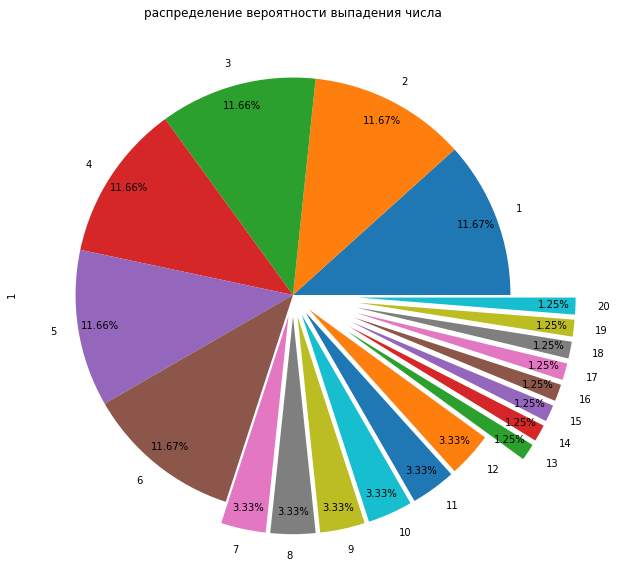

In [12]:
df = pd.DataFrame(var_num)
plt.figure(figsize=(10,10))
plt.title('распределение вероятности выпадения числа')
df[1].value_counts(sort=False).plot.pie(
    autopct='%1.2f%%', 
    pctdistance = 0.9, 
    explode =[0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])
plt.show()

In [13]:
var_num[:,0] = 12
res = np.diff(var_num, axis=1).ravel()
print('Если на первом кубике выпало число 12, вероятность того, что на следующем кубике выпадет меньшее число: {:.2%}'.format(res[res<0].shape[0]/res.shape[0]))

Если на первом кубике выпало число 12, вероятность того, что на следующем кубике выпадет меньшее число: 86.66%


#### n=4

In [14]:
var_cube_get = np.full((i,2), 0, dtype = np.int8)
var_cube_get[:,1] = np.random.choice([0,1,2], i)

In [15]:
# получаем массив из случайных значений соответствующих кубиков
var_num = np.full((i,2),0, dtype = np.int8)
var_num[var_cube_get==0] = np.random.choice(np.arange(1, 7), var_num[var_cube_get==0].shape[0]) # 6-гранный
var_num[var_cube_get==1] = np.random.choice(np.arange(1, 13), var_num[var_cube_get==1].shape[0]) # 12-гранный
var_num[var_cube_get==2] = np.random.choice(np.arange(1, 21), var_num[var_cube_get==2].shape[0]) # 20-гранный

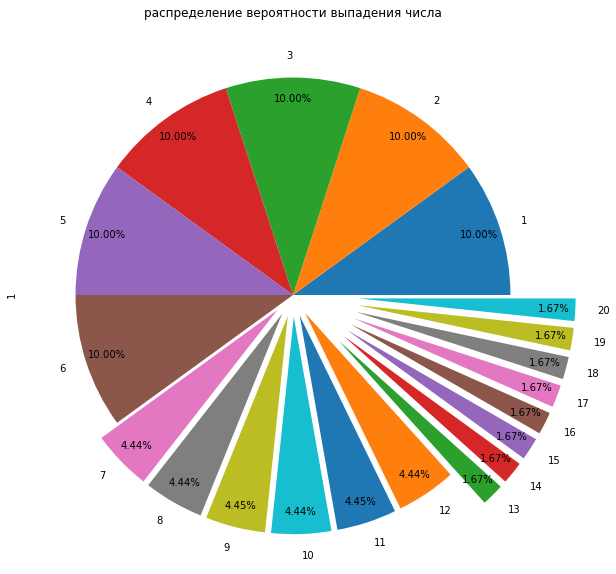

In [16]:
df = pd.DataFrame(var_num)
plt.figure(figsize=(10,10))
plt.title('распределение вероятности выпадения числа')
df[1].value_counts(sort=False).plot.pie(
    autopct='%1.2f%%', 
    pctdistance = 0.9, 
    explode =[0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])
plt.show()

In [17]:
var_num[:,0] = 4
res = np.diff(var_num, axis=1).ravel()
print('Если на первом кубике выпало число 4, вероятность того, что на следующем кубике выпадет меньшее число: {:.2%}'.format(res[res<0].shape[0]/res.shape[0]))

Если на первом кубике выпало число 4, вероятность того, что на следующем кубике выпадет меньшее число: 30.00%
